In [153]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from water_properties import density, enthalpy, heat_capacity, conductivity, viscosity

In [140]:
def simplified_model_for_fit(x, a00, a01, a02, a10, a11, a12, a20, a21, a22):
    
    c = [[a00, a01, a02],[a10, a11, a12],[a20, a21, a22]] 
    
    T, P = x
    
    return simplified_model(T, P, c)

In [141]:
def simplified_model(T, P, c):
    
    return np.polynomial.polynomial.polyval2d(T, P, c)

In [142]:
def calculate_output(func,X1,X2,*args):
    Z = np.zeros_like(X1)
    for i in range(X1.shape[0]):                     
        for j in range(X2.shape[1]):
            Z[i,j] = func(X1[i,j],X2[i,j],*args)[0]
    return Z

In [143]:
limits = [293., 353., 100000., 2*np.pi]
npoints = 25
T = np.linspace(limits[0], limits[1], npoints)
P = np.linspace(limits[2], limits[3], npoints)
X1, X2 = np.meshgrid(T, P)


In [144]:
def fit(model, X1, X2):
    Z = calculate_output(model,X1,X2)
    size = X1.shape
    x1_1d = X1.reshape((1, np.prod(size)))
    x2_1d = X2.reshape((1, np.prod(size)))
    z_1d = Z.reshape((1, np.prod(size)))

    xdata = np.vstack((x1_1d, x2_1d))
    ydata = z_1d[0]
    popt, pcov = curve_fit(simplified_model_for_fit, xdata, ydata)
    
    c = popt.reshape((3,3))
    
    Z_fit = simplified_model(X1,X2,c)
    
    z_fit_1d = Z_fit.reshape((1, np.prod(size)))
    
    # residual sum of squares
    ss_res = np.sum((z_1d[0] - z_fit_1d[0]) ** 2)

    # total sum of squares
    ss_tot = np.sum((z_1d[0] - np.mean(z_1d[0])) ** 2)

    # r-squared
    r2 = 1 - (ss_res / ss_tot)
    
    return (c, Z_fit, Z, r2)

In [145]:
def plot_result(name, X1, X2, Z, Z_fit):
    
    plt.subplot(1, 2, 1)
    plt.title("Real {0}".format(name))
    plt.pcolormesh(X1, X2, Z)
    plt.axis(limits)
    plt.colorbar()
    plt.subplot(1, 2, 2)
    plt.title("Fitted {0}".format(name))
    plt.pcolormesh(X1, X2, Z_fit)
    plt.axis(limits)
    plt.colorbar()
    plt.show()

DENSITY


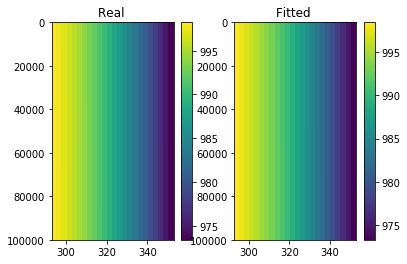

Parameters: [[ 7.78456318e+02  2.40153974e-06  8.29162678e-13]
 [ 1.74126580e+00 -1.20391370e-08 -5.01742419e-15]
 [-3.38166607e-03  1.84233265e-11  7.58071678e-18]]
R2: 0.9999413863494527


In [146]:
print("DENSITY")
c, Z_fit, Z, r2 = fit(density, X1, X2)
plot_result("", X1, X2, Z, Z_fit)
print("Parameters:",c)
print("R2:", r2)
c_dict = dict()
c_dict['density'] = c

ENTHALPY


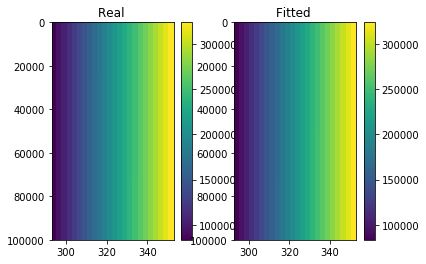

Parameters: [[-1.13185854e+06  1.05561614e-03  1.17467908e-08]
 [ 4.11870305e+03  1.20950026e-06 -7.29010857e-11]
 [ 9.79273111e-02 -5.55494252e-09  1.12754536e-13]]
R2: 0.9999999458464107


In [147]:
print("ENTHALPY")
c, Z_fit, Z, r2 = fit(enthalpy, X1, X2)
plot_result("", X1, X2, Z, Z_fit)
print("Parameters:",c)
print("R2:", r2)
c_dict['enthalpy'] = c

VISCOSITY


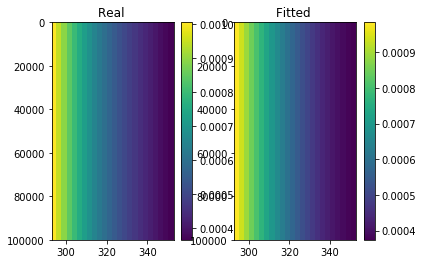

Parameters: [[ 1.89901972e-02 -2.70460526e-11 -4.75198595e-18]
 [-1.03966136e-04  1.60710675e-13  2.94337924e-20]
 [ 1.45088884e-07 -2.36355370e-16 -4.54320112e-23]]
R2: 0.9979308147186903


In [148]:
print("VISCOSITY")
c, Z_fit, Z, r2 = fit(viscosity, X1, X2)
plot_result("", X1, X2, Z, Z_fit)
print("Parameters:",c)
print("R2:", r2)
c_dict['viscosity'] = c

HEAT CAPACITY


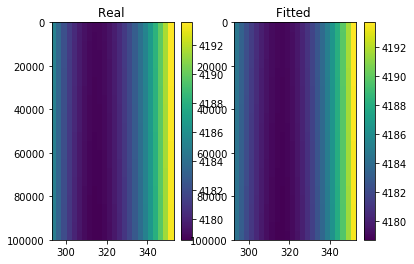

Parameters: [[ 5.34437955e+03 -4.56546130e-05 -1.71806886e-12]
 [-7.40001244e+00  2.54359095e-07  1.07068599e-14]
 [ 1.17465273e-02 -3.72077253e-10 -1.64404045e-17]]
R2: 0.9981279970487148


In [149]:
print("HEAT CAPACITY")
c, Z_fit, Z, r2 = fit(heat_capacity, X1, X2)
plot_result("", X1, X2, Z, Z_fit)
print("Parameters:",c)
print("R2:", r2)
c_dict['heat_capacity'] = c

CONDUCTIVITY


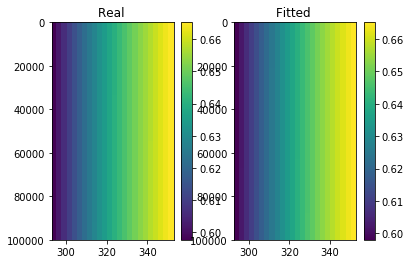

Parameters: [[-6.70232734e-01  3.72674263e-09  1.71778072e-14]
 [ 6.97259473e-03 -1.91154051e-11 -1.06811308e-16]
 [-9.02411509e-06  2.85075484e-14  1.65519545e-19]]
R2: 0.999954609108486


In [150]:
print("CONDUCTIVITY")
c, Z_fit, Z, r2 = fit(conductivity, X1, X2)
plot_result("", X1, X2, Z, Z_fit)
print("Parameters:",c)
print("R2:", r2)
c_dict['conductivity'] = c

In [151]:
import pprint
pprint.pprint(c_dict)

{'conductivity': array([[-6.70232734e-01,  3.72674263e-09,  1.71778072e-14],
       [ 6.97259473e-03, -1.91154051e-11, -1.06811308e-16],
       [-9.02411509e-06,  2.85075484e-14,  1.65519545e-19]]),
 'density': array([[ 7.78456318e+02,  2.40153974e-06,  8.29162678e-13],
       [ 1.74126580e+00, -1.20391370e-08, -5.01742419e-15],
       [-3.38166607e-03,  1.84233265e-11,  7.58071678e-18]]),
 'enthalpy': array([[-1.13185854e+06,  1.05561614e-03,  1.17467908e-08],
       [ 4.11870305e+03,  1.20950026e-06, -7.29010857e-11],
       [ 9.79273111e-02, -5.55494252e-09,  1.12754536e-13]]),
 'heat_capacity': array([[ 5.34437955e+03, -4.56546130e-05, -1.71806886e-12],
       [-7.40001244e+00,  2.54359095e-07,  1.07068599e-14],
       [ 1.17465273e-02, -3.72077253e-10, -1.64404045e-17]]),
 'viscosity': array([[ 1.89901972e-02, -2.70460526e-11, -4.75198595e-18],
       [-1.03966136e-04,  1.60710675e-13,  2.94337924e-20],
       [ 1.45088884e-07, -2.36355370e-16, -4.54320112e-23]])}
